# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

In [7]:
# page.text

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'html')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [10]:
# soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [11]:
# print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).


Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [9]:

for link in soup.find_all('a'):
    print(link.get('href'))
#     break

/search
https://offline.nplus1.ru/
https://nplus.pro/
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/blog/2022/04/01/samotek
/search/empty/869
/search/empty/874
/search/empty/880
/search/empty/768
/search/empty/890
/search/empty/871
/search/empty/876
/search/empty/775
/search/empty/767
/search/empty/771
/search/empty/772
/search/empty/778
/search/empty/917
/search/empty/918
/search/empty/824
https://t.me/nplusone
https://vk.com/nplusone
https://ok.ru/nplus1
https://twitter.com/nplusodin
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/news/2015/09/21/editor-thy-name
/search/empty/869
/search/empty/874
/search/empty/880
/search/empty/768
/search/empty/890
/search/empty/871
/search/empty/876
/search/empty/775
/search/empty/767
/search/empty/771
/search/empty/772
/search/empty/778
/search/empty/917
/search/empty/918
/search/empty/824
https://offline.nplus1.ru/
https://nplus.pro/
https://t.me/nplusone
h

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [12]:
# urls = []

# for link in soup.find_all('a'):
#     if '/news' in link.get('href'):
#         urls.append('https://nplus1.ru'+link.get('href'))

urls = [link.get('href') 
        for link in soup.find_all('a') 
        if 'https://nplus1.ru/news/2023' in link.get('href')]

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [14]:
urls[:5]

['https://nplus1.ru/news/2023/03/10/bees-dance',
 'https://nplus1.ru/news/2023/03/14/fda-Daybue',
 'https://nplus1.ru/news/2023/03/14/Schwinger-effect-in-graphene',
 'https://nplus1.ru/news/2023/03/14/global-burden-of-metabolic-disease',
 'https://nplus1.ru/news/2023/03/14/ape-spinning']

In [26]:
# full_urls = []

# for u in urls:
#     res = 'https://nplus1.ru' + u
#     full_urls.append(res) 

# full_urls

In [15]:
# urls

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [16]:
url0 = urls[0]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'html')

In [20]:
url0

'https://nplus1.ru/news/2023/03/10/bees-dance'

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [19]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="#f26e40" name="msapplication-TileColor"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="8c90b02c84ac3b72" name="yandex-verification"/>,
 <meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" name="description"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:site_name"/>,
 <meta content="Молодые пчелы научились танцевать у опытных" property="og:title"/>,
 <meta content="https://minio.nplus1.ru/app-images/763480/640a351da9eec_cover_share.jpeg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2023/03/10/bees-dance" property="og:url"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:description"/>,
 <meta content="article" property="og:type"/>,
 <meta content="2023-03-10" item

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [21]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Катерина Петрова" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [22]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Катерина Петрова" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [23]:
soup0.find_all('meta', {'name' : 'author'})[0].get('content')

'Катерина Петрова'

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [24]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs
author

{'name': 'author', 'content': 'Катерина Петрова'}

Аналогичным образом извлечем дату, заголовок и описание.

In [29]:
soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')

'Молодые пчелы научились танцевать у опытных'

In [36]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()



Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [65]:
new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

time_published = new_data[0].get_text()
date_published = new_data[1].get_text()
complexity = new_data[2].get_text()
themes = ', '.join(i.get_text() for i in new_data[3:])

In [69]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]


In [80]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}
links = ', '.join(links)

In [92]:
full_text = '\n'.join([p.get_text() for p in paragraphs])

In [50]:
final_text

'Использование всех текстовых материалов без изменений в некоммерческих целях разрешается со ссылкой на N + 1. Все аудиовизуальные произведения являются собственностью своих авторов и правообладателей и используются только в образовательных и информационных целях. Если вы являетесь собственником того или иного произведения и не согласны с его размещением на нашем сайте, пожалуйста, напишите на kirill@nplus1.ru Связь с редакцией: info@nplus1.ru'

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [93]:
def GetNews(url0):
    """
    Returns a tuple with 
    url0, date_published, time_published, author, description, title, complexity, themes, links,full_text
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    
    author = soup0.find_all('meta', {'name' : 'author'})[0].get('content')
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
    description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()


    
    new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

    time_published = new_data[0].get_text()
    date_published = new_data[1].get_text()
    complexity = new_data[2].get_text()
    themes = ', '.join(i.get_text() for i in new_data[3:])
    
    paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]
    links = set()
    for p in paragraphs:
        links|={i.get('href') for i in p.find_all('a')}
    links = ', '.join(links)
    full_text = '\n'.join([p.get_text() for p in paragraphs])
    
    return url0, date_published, time_published, author, description, title, complexity, themes, links,full_text

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [94]:
GetNews(url0)

('https://nplus1.ru/news/2023/03/10/bees-dance',
 '10.03.23',
 '16:15',
 'Катерина Петрова',
 'Молодые пчелы научились танцевать у опытных\nНаблюдение за старшими сородичами помогло им меньше ошибаться',
 'Молодые пчелы научились танцевать у опытных',
 '3.6',
 'Зоология, Биология',
 'https://nplus1.ru/news/2018/09/06/ungulate-culture, https://www.science.org/doi/10.1126/science.ade1702, https://nplus1.ru/news/2023/02/18/grooming-handclasp, https://www.sciencedirect.com/science/article/pii/S0960982220307405, https://nplus1.ru/news/2022/07/15/rats, https://nplus1.ru/news/2015/09/10/sperm-whale-dialects, https://nplus1.ru/news/2019/07/10/coyote-decision, https://nplus1.ru/news/2017/02/16/whooping-signal, https://www.pnas.org/doi/abs/10.1073/pnas.1332441100, https://nplus1.ru/news/2016/10/05/pulltherope, https://nplus1.ru/news/2019/09/25/jackdaws, https://nplus1.ru/news/2017/02/24/bumblebee',
 'Исследователи из Китая и США показали, что правильный виляющий танец пчел зависит от социального

In [95]:
from time import sleep
from tqdm import tqdm

In [97]:
import random

4.958814155017188

In [112]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in tqdm(urls):
    res = GetNews(link)
    news.append(res)
    sleep(random.random()) # задержка в 3 секунды

100%|██████████| 67/67 [00:47<00:00,  1.41it/s]


Так теперь выглядит первый элемент списка:

In [115]:
news[0]

('https://nplus1.ru/news/2023/03/10/bees-dance',
 '10.03.23',
 '16:15',
 'Катерина Петрова',
 'Молодые пчелы научились танцевать у опытных\nНаблюдение за старшими сородичами помогло им меньше ошибаться',
 'Молодые пчелы научились танцевать у опытных',
 '3.6',
 'Зоология, Биология',
 'https://nplus1.ru/news/2018/09/06/ungulate-culture, https://www.science.org/doi/10.1126/science.ade1702, https://nplus1.ru/news/2023/02/18/grooming-handclasp, https://www.sciencedirect.com/science/article/pii/S0960982220307405, https://nplus1.ru/news/2022/07/15/rats, https://nplus1.ru/news/2015/09/10/sperm-whale-dialects, https://nplus1.ru/news/2019/07/10/coyote-decision, https://nplus1.ru/news/2017/02/16/whooping-signal, https://www.pnas.org/doi/abs/10.1073/pnas.1332441100, https://nplus1.ru/news/2016/10/05/pulltherope, https://nplus1.ru/news/2019/09/25/jackdaws, https://nplus1.ru/news/2017/02/24/bumblebee',
 'Исследователи из Китая и США показали, что правильный виляющий танец пчел зависит от социального

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [114]:
import pandas as pd

In [116]:
df = pd.DataFrame(news)

In [117]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,https://nplus1.ru/news/2023/03/10/bees-dance,10.03.23,16:15,Катерина Петрова,Молодые пчелы научились танцевать у опытных\nН...,Молодые пчелы научились танцевать у опытных,3.6,"Зоология, Биология",https://nplus1.ru/news/2018/09/06/ungulate-cul...,"Исследователи из Китая и США показали, что пра..."
1,https://nplus1.ru/news/2023/03/14/fda-Daybue,14.03.23,18:20,Слава Гоменюк,FDA одобрило первый препарат для лечения синдр...,FDA одобрило первый препарат для лечения синдр...,2.9,Медицина,"https://nplus1.ru/news/2016/01/26/asd-monkey, ...",Управление по санитарному надзору за качеством...


Переименуем столбцы в базе.

In [118]:
df.columns = ['url', 'date_published', 'time_published', 'author', 'description', 'title', 'complexity', 'themes', 'links','full_text']

In [119]:
df.head(2)

,url,date_published,time_published,author,description,title,complexity,themes,links,full_text
0,https://nplus1.ru/news/2023/03/10/bees-dance,10.03.23,16:15,Катерина Петрова,Молодые пчелы научились танцевать у опытных\nН...,Молодые пчелы научились танцевать у опытных,3.6,"Зоология, Биология",https://nplus1.ru/news/2018/09/06/ungulate-cul...,"Исследователи из Китая и США показали, что пра..."
1,https://nplus1.ru/news/2023/03/14/fda-Daybue,14.03.23,18:20,Слава Гоменюк,FDA одобрило первый препарат для лечения синдр...,FDA одобрило первый препарат для лечения синдр...,2.9,Медицина,"https://nplus1.ru/news/2016/01/26/asd-monkey, ...",Управление по санитарному надзору за качеством...


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [120]:
df['complexity'] = df['complexity'].apply(float)

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [35]:
df.diffc.describe()

count    30.000000
mean      4.416667
std       2.370521
min       1.100000
25%       2.125000
50%       4.900000
75%       6.750000
max       8.200000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

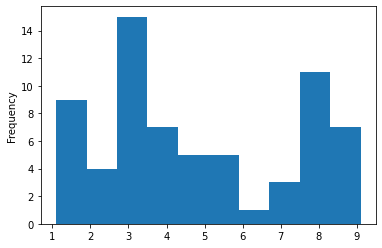

In [122]:
%matplotlib inline
df.complexity.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [37]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [ ]:
df.text[0]

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [38]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [39]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в ходе которой были проведены испытания всех систем, в том числе пробежки по аэродрому. Полет прошел в штатном режиме. В воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в перспективе должен заменить легкий транспортник Ан-26. Он будет использоваться для перевозки и десантирования легкой техники, грузов и бойцов, его грузоподъемность — около пяти тонн. Самолет сможет развивать скорость до 550 километров в час и совершать полеты на расстояние до 3,4 тысячи километров, а при взлете с грунтовых аэродромов и максимальной загрузкой — до 1,2 тысячи километров. Транспортник сможет взлетать с взлетно-посадочных полос длиной не более 900 метров. Пробег Ил-112В при посадк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')